# Import Library

In [1]:
import json 
import pandas as pd
import numpy as np
from pathlib import Path
import PIL
from PIL import Image
import os, time, random
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh
from IPython.display import Image, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
from IPython.display import Image  # to display images
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(1) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.10.0+cu102 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', major=7, minor=5, total_memory=11019MB, multi_processor_count=68)


## Detection 

In [23]:
## work on yolov5 directory
os.chdir('/home/kannika/yolov5/')

In [24]:
!pwd

/home/kannika/yolov5


> ## Predict with **Confident ScoreThr == 0.0 - 1.0**

In [4]:
###  --iou-thres 0.45 **** -------------Seting -------****
## test set 10 Images
threshold_score = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
name = ['0','01','02','03','04','05','06','07','08','09']
for i, j in zip(threshold_score, name):
    !python detect.py --weights /media/tohn/SSD_ex/YOLOv5/model_5m/prostate/Promise12set-e400/weights/ModelR1-Promise12-5m_last.pt --img 640 --source /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test --iou-thres 0.50 --conf-thres {i} --device 1 --save-txt --save-conf --save-crop --max-det 10 --project /media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset --name PCI{j}

detect: weights=['/media/tohn/SSD_ex/YOLOv5/model_5m/prostate/Promise12set-e400/weights/ModelR1-Promise12-5m_last.pt'], source=/media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.0, iou_thres=0.5, max_det=10, device=1, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset, name=PCI0, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-171-g5bd6a97 torch 1.10.0+cu102 CUDA:1 (GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case00.jpg: 640x640 10 prostates, Done. (0.011s)
image 2/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image

image 58/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case10.jpg: 640x640 10 prostates, Done. (0.011s)
image 59/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case11.jpg: 640x640 10 prostates, Done. (0.011s)
image 60/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case15.jpg: 640x640 10 prostates, Done. (0.011s)
image 61/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case17.jpg: 640x640 10 prostates, Done. (0.011s)
image 62/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case20.jpg: 640x640 10 prostates, Done. (0.011s)
image 63/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case22.jpg: 640x640 10 prostates, Done. (0.011s)
image 64/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case23.jpg: 640x640 10 prostates, Done. (0.011s)
image 65/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13C

image 121/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case07.jpg: 640x640 10 prostates, Done. (0.011s)
image 122/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case10.jpg: 640x640 10 prostates, Done. (0.011s)
image 123/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case16.jpg: 640x640 10 prostates, Done. (0.011s)
image 124/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case17.jpg: 640x640 10 prostates, Done. (0.011s)
image 125/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case19.jpg: 640x640 10 prostates, Done. (0.011s)
image 126/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case22.jpg: 640x640 10 prostates, Done. (0.011s)
image 127/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case23.jpg: 640x640 10 prostates, Done. (0.011s)
image 128/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/1

image 184/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case00.jpg: 640x640 10 prostates, Done. (0.011s)
image 185/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case02.jpg: 640x640 10 prostates, Done. (0.011s)
image 186/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case06.jpg: 640x640 10 prostates, Done. (0.011s)
image 187/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case11.jpg: 640x640 10 prostates, Done. (0.011s)
image 188/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case12.jpg: 640x640 10 prostates, Done. (0.011s)
image 189/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case17.jpg: 640x640 10 prostates, Done. (0.011s)
image 190/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case00.jpg: 640x640 10 prostates, Done. (0.011s)
image 191/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8C

image 247/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case06.jpg: 640x640 10 prostates, Done. (0.011s)
image 248/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case08.jpg: 640x640 10 prostates, Done. (0.011s)
image 249/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case11.jpg: 640x640 10 prostates, Done. (0.011s)
image 250/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case12.jpg: 640x640 10 prostates, Done. (0.011s)
image 251/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC18Case05.jpg: 640x640 10 prostates, Done. (0.011s)
image 252/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC18Case07.jpg: 640x640 10 prostates, Done. (0.011s)
image 253/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC18Case09.jpg: 640x640 10 prostates, Done. (0.011s)
image 254/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC18C

image 310/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC31Case11.jpg: 640x640 10 prostates, Done. (0.011s)
image 311/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC32Case05.jpg: 640x640 10 prostates, Done. (0.011s)
image 312/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC32Case06.jpg: 640x640 10 prostates, Done. (0.011s)
image 313/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC33Case00.jpg: 640x640 10 prostates, Done. (0.011s)
image 314/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC33Case09.jpg: 640x640 10 prostates, Done. (0.011s)
image 315/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC35Case02.jpg: 640x640 10 prostates, Done. (0.011s)
image 316/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC35Case06.jpg: 640x640 10 prostates, Done. (0.011s)
image 317/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC36C

image 374/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK18Case38.jpg: 640x640 10 prostates, Done. (0.011s)
image 375/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK19Case42.jpg: 640x640 10 prostates, Done. (0.011s)
image 376/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK20Case42.jpg: 640x640 10 prostates, Done. (0.011s)
image 377/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK21Case42.jpg: 640x640 10 prostates, Done. (0.011s)
image 378/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK22Case42.jpg: 640x640 10 prostates, Done. (0.011s)
image 379/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK23Case42.jpg: 640x640 10 prostates, Done. (0.011s)
image 380/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK2Case43.jpg: 640x640 10 prostates, Done. (0.011s)
image 381/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK3Case39.jpg: 640x640 10 pros

image 438/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB20Case16.jpg: 640x640 10 prostates, Done. (0.011s)
image 439/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB20Case18.jpg: 640x640 10 prostates, Done. (0.011s)
image 440/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case01.jpg: 640x640 10 prostates, Done. (0.011s)
image 441/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case02.jpg: 640x640 10 prostates, Done. (0.011s)
image 442/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case05.jpg: 640x640 10 prostates, Done. (0.011s)
image 443/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case09.jpg: 640x640 10 prostates, Done. (0.011s)
image 444/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case11.jpg: 640x640 10 prostates, Done. (0.011s)
image 445/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21C

image 501/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB28Case05.jpg: 640x640 10 prostates, Done. (0.011s)
image 502/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB28Case08.jpg: 640x640 10 prostates, Done. (0.011s)
image 503/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB28Case10.jpg: 640x640 10 prostates, Done. (0.011s)
image 504/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB28Case11.jpg: 640x640 10 prostates, Done. (0.011s)
image 505/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB28Case13.jpg: 640x640 10 prostates, Done. (0.011s)
image 506/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB28Case14.jpg: 640x640 10 prostates, Done. (0.011s)
image 507/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB28Case16.jpg: 640x640 10 prostates, Done. (0.011s)
image 508/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29C

image 564/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB35Case04.jpg: 640x640 10 prostates, Done. (0.011s)
image 565/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB35Case05.jpg: 640x640 10 prostates, Done. (0.011s)
image 566/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB35Case08.jpg: 640x640 10 prostates, Done. (0.011s)
image 567/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB35Case11.jpg: 640x640 10 prostates, Done. (0.011s)
image 568/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB35Case14.jpg: 640x640 10 prostates, Done. (0.011s)
image 569/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB35Case15.jpg: 640x640 10 prostates, Done. (0.011s)
image 570/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB35Case16.jpg: 640x640 10 prostates, Done. (0.011s)
image 571/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36C

image 627/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB43Case08.jpg: 640x640 10 prostates, Done. (0.011s)
image 628/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB43Case16.jpg: 640x640 10 prostates, Done. (0.011s)
image 629/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB43Case17.jpg: 640x640 10 prostates, Done. (0.011s)
image 630/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB44Case08.jpg: 640x640 10 prostates, Done. (0.011s)
image 631/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB44Case11.jpg: 640x640 10 prostates, Done. (0.011s)
image 632/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB44Case15.jpg: 640x640 10 prostates, Done. (0.011s)
image 633/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB44Case17.jpg: 640x640 10 prostates, Done. (0.011s)
image 634/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB45C

image 690/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case29.jpg: 640x640 10 prostates, Done. (0.011s)
image 691/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case03.jpg: 640x640 10 prostates, Done. (0.011s)
image 692/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case12.jpg: 640x640 10 prostates, Done. (0.011s)
image 693/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case17.jpg: 640x640 10 prostates, Done. (0.011s)
image 694/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case18.jpg: 640x640 10 prostates, Done. (0.011s)
image 695/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case19.jpg: 640x640 10 prostates, Done. (0.011s)
image 696/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case21.jpg: 640x640 10 prostates, Done. (0.011s)
image 697/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case22.jp

image 754/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case02.jpg: 640x640 10 prostates, Done. (0.011s)
image 755/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case08.jpg: 640x640 10 prostates, Done. (0.011s)
image 756/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case09.jpg: 640x640 10 prostates, Done. (0.011s)
image 757/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case14.jpg: 640x640 10 prostates, Done. (0.011s)
image 758/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case15.jpg: 640x640 10 prostates, Done. (0.011s)
image 759/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case16.jpg: 640x640 10 prostates, Done. (0.011s)
image 760/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case21.jpg: 640x640 10 prostates, Done. (0.011s)
image 761/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case22.jpg: 640x6

image 818/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case15.jpg: 640x640 10 prostates, Done. (0.011s)
image 819/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case17.jpg: 640x640 10 prostates, Done. (0.011s)
image 820/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case18.jpg: 640x640 10 prostates, Done. (0.011s)
image 821/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case19.jpg: 640x640 10 prostates, Done. (0.011s)
image 822/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case20.jpg: 640x640 10 prostates, Done. (0.011s)
image 823/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case21.jpg: 640x640 10 prostates, Done. (0.011s)
image 824/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case22.jpg: 640x640 10 prostates, Done. (0.011s)
image 825/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case23.jpg: 640x6

image 882/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL15Case33.jpg: 640x640 10 prostates, Done. (0.011s)
image 883/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case26.jpg: 640x640 10 prostates, Done. (0.011s)
image 884/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case27.jpg: 640x640 10 prostates, Done. (0.011s)
image 885/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case30.jpg: 640x640 10 prostates, Done. (0.011s)
image 886/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case31.jpg: 640x640 10 prostates, Done. (0.011s)
image 887/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case34.jpg: 640x640 10 prostates, Done. (0.011s)
image 888/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case26.jpg: 640x640 10 prostates, Done. (0.011s)
image 889/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case28.jpg: 640x6

image 6/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case08.jpg: 640x640 1 prostate, Done. (0.011s)
image 7/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case10.jpg: 640x640 1 prostate, Done. (0.011s)
image 8/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case11.jpg: 640x640 1 prostate, Done. (0.011s)
image 9/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case13.jpg: 640x640 1 prostate, Done. (0.011s)
image 10/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case15.jpg: 640x640 1 prostate, Done. (0.011s)
image 11/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case17.jpg: 640x640 1 prostate, Done. (0.011s)
image 12/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case18.jpg: 640x640 1 prostate, Done. (0.011s)
image 13/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case19.jpg: 640x640

image 71/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 72/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 73/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 74/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 75/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 76/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 77/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 78/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case10.jpg: 640

image 136/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 137/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 138/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 139/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 140/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 141/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 142/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 143/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case27.

image 201/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 202/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 203/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 204/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 205/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 206/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 207/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 208/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case17.jpg: 640

image 266/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 267/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 268/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 269/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC21Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 270/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC21Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 271/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC21Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 272/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC21Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 273/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC21Case09.jpg: 640

image 333/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC9Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 334/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case38.jpg: 640x640 1 prostate, Done. (0.008s)
image 335/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case40.jpg: 640x640 1 prostate, Done. (0.008s)
image 336/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case41.jpg: 640x640 1 prostate, Done. (0.008s)
image 337/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case43.jpg: 640x640 1 prostate, Done. (0.008s)
image 338/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case44.jpg: 640x640 1 prostate, Done. (0.008s)
image 339/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case45.jpg: 640x640 1 prostate, Done. (0.008s)
image 340/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case49.jpg: 640x640 1 prostate, Done.

image 401/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK8Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 402/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case39.jpg: 640x640 2 prostates, Done. (0.008s)
image 403/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case43.jpg: 640x640 1 prostate, Done. (0.008s)
image 404/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case45.jpg: 640x640 1 prostate, Done. (0.008s)
image 405/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case46.jpg: 640x640 1 prostate, Done. (0.008s)
image 406/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case47.jpg: 640x640 1 prostate, Done. (0.008s)
image 407/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case48.jpg: 640x640 1 prostate, Done. (0.008s)
image 408/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case49.jpg: 640x640 1 prostate, Done. (0.008s)

image 468/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 469/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 470/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 471/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 472/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 473/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 474/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 475/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case15.jpg: 640

image 535/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB31Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 536/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB31Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 537/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB31Case15.jpg: 640x640 1 prostate, Done. (0.008s)
image 538/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB31Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 539/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 540/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 541/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 542/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case05.jpg: 640

image 602/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB39Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 603/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB39Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 604/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB39Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 605/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 606/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 607/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case07.jpg: 640x640 2 prostates, Done. (0.008s)
image 608/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 609/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case09.jpg: 64

image 669/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 670/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 671/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 672/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 673/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 674/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 675/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 676/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case03.jpg: 640x640 1 p

image 735/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI19Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 736/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI19Case23.jpg: 640x640 2 prostates, Done. (0.008s)
image 737/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI19Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 738/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI1Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 739/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI1Case12.jpg: 640x640 Done. (0.008s)
image 740/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI1Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 741/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI20Case02.jpg: 640x640 2 prostates, Done. (0.008s)
image 742/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI2Case00.jpg: 640x640 1 prostate, Done.

image 801/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 802/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 803/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 804/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 805/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 806/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 807/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 808/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case23.jpg: 640x640 1 prostate,

image 867/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL13Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 868/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL13Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 869/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL13Case31.jpg: 640x640 1 prostate, Done. (0.008s)
image 870/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL13Case33.jpg: 640x640 1 prostate, Done. (0.008s)
image 871/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL14Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 872/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL14Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 873/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL14Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 874/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL14Case30.jpg: 640x640 1 prostate,

detect: weights=['/media/tohn/SSD_ex/YOLOv5/model_5m/prostate/Promise12set-e400/weights/ModelR1-Promise12-5m_last.pt'], source=/media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.2, iou_thres=0.5, max_det=10, device=1, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset, name=PCI02, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-171-g5bd6a97 torch 1.10.0+cu102 CUDA:1 (GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case00.jpg: 640x640 1 prostate, Done. (0.011s)
image 2/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_

image 62/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 63/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 64/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 65/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 66/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 67/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 68/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case29.jpg: 640x640 1 prostate, Done. (0.008s)
image 69/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case00.jpg: 640

image 127/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 128/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 129/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 130/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 131/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 132/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 133/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 134/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case10.

image 192/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 193/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 194/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 195/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 196/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 197/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 198/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 199/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case12.jpg: 640

image 257/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 258/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 259/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 260/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 261/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 262/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 263/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 264/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case06.jpg: 640

image 324/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 325/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 326/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 327/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 328/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case05.jpg: 640x640 2 prostates, Done. (0.008s)
image 329/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 330/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 331/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case12.jpg: 640x640 1 

image 389/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK5Case44.jpg: 640x640 1 prostate, Done. (0.008s)
image 390/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK5Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 391/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK6Case46.jpg: 640x640 1 prostate, Done. (0.008s)
image 392/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK6Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 393/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case38.jpg: 640x640 1 prostate, Done. (0.008s)
image 394/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case39.jpg: 640x640 1 prostate, Done. (0.008s)
image 395/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case41.jpg: 640x640 1 prostate, Done. (0.008s)
image 396/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case48.jpg: 640x640 1 prostate, Done. (0.008s)


image 456/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 457/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 458/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 459/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 460/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 461/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 462/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 463/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case05.jpg: 640

image 520/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 521/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case00.jpg: 640x640 2 prostates, Done. (0.008s)
image 522/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 523/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 524/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 525/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 526/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 527/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case16.jpg: 64

image 587/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 588/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 589/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 590/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 591/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 592/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 593/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 594/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case10.jpg: 640

image 654/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 655/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 656/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 657/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 658/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 659/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 660/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 661/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case06.jpg: 640x640 1 p

image 720/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 721/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 722/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 723/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 724/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 725/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 726/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 727/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI17Case02.jpg: 640x640 1 p

image 787/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 788/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 789/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case15.jpg: 640x640 1 prostate, Done. (0.008s)
image 790/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 791/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 792/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 793/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 794/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case22.jpg: 640x640 1 prostate,

image 853/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 854/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 855/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 856/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 857/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case30.jpg: 640x640 1 prostate, Done. (0.008s)
image 858/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case32.jpg: 640x640 1 prostate, Done. (0.008s)
image 859/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case36.jpg: 640x640 1 prostate, Done. (0.008s)
image 860/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL12Case01.jpg: 640x640 1 prostate,

image 920/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL7Case37.jpg: 640x640 1 prostate, Done. (0.008s)
image 921/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 922/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 923/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 924/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case32.jpg: 640x640 1 prostate, Done. (0.008s)
image 925/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case34.jpg: 640x640 1 prostate, Done. (0.008s)
image 926/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case36.jpg: 640x640 1 prostate, Done. (0.008s)
image 927/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case37.jpg: 640x640 1 prostate, Done. (

image 43/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 44/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 45/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 46/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 47/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 48/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 49/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 50/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case24.jpg: 640

image 108/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 109/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 110/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 111/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 112/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 113/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 114/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 115/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case24.

image 174/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI24Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 175/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI25Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 176/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI26Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 177/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI26Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 178/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI26Case29.jpg: 640x640 1 prostate, Done. (0.008s)
image 179/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI27Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 180/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI28Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 181/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI5Case17.j

image 239/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC16Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 240/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC16Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 241/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC16Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 242/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC16Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 243/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC16Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 244/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC16Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 245/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 246/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case05.jpg: 640

image 304/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC30Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 305/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC30Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 306/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC30Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 307/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC30Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 308/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC31Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 309/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC31Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 310/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC31Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 311/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC32Case05.jpg: 640

image 372/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK16Case40.jpg: 640x640 1 prostate, Done. (0.008s)
image 373/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK17Case42.jpg: 640x640 1 prostate, Done. (0.008s)
image 374/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK18Case38.jpg: 640x640 1 prostate, Done. (0.008s)
image 375/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK19Case42.jpg: 640x640 1 prostate, Done. (0.008s)
image 376/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK20Case42.jpg: 640x640 1 prostate, Done. (0.008s)
image 377/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK21Case42.jpg: 640x640 1 prostate, Done. (0.008s)
image 378/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK22Case42.jpg: 640x640 1 prostate, Done. (0.008s)
image 379/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK23Case42.jpg: 640x640 1 prostate, Done. (

image 440/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 441/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 442/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 443/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 444/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 445/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 446/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case15.jpg: 640x640 1 prostate, Done. (0.008s)
image 447/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case18.jpg: 640

image 507/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB28Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 508/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 509/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 510/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 511/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 512/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 513/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 514/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case08.jpg: 640

image 574/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 575/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 576/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 577/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 578/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 579/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 580/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case15.jpg: 640x640 1 prostate, Done. (0.008s)
image 581/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case03.jpg: 640

image 640/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB9Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 641/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 642/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 643/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 644/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 645/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 646/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 647/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case11.jpg: 640x640 1 p

image 707/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 708/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case17.jpg: 640x640 Done. (0.008s)
image 709/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case18.jpg: 640x640 2 prostates, Done. (0.008s)
image 710/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 711/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 712/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case01.jpg: 640x640 Done. (0.008s)
image 713/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 714/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case15.jpg: 640x640 1 prostate, Done. (0.008s)

image 773/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 774/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case13.jpg: 640x640 Done. (0.008s)
image 775/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 776/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 777/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 778/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 779/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 780/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case24.jpg: 640x640 1 prostate, Done. (0.00

image 840/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI9Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 841/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI9Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 842/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI9Case29.jpg: 640x640 1 prostate, Done. (0.008s)
image 843/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 844/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 845/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 846/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case30.jpg: 640x640 1 prostate, Done. (0.008s)
image 847/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case31.jpg: 640x640 1 prostate,

image 906/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 907/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 908/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 909/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case30.jpg: 640x640 1 prostate, Done. (0.008s)
image 910/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case33.jpg: 640x640 1 prostate, Done. (0.008s)
image 911/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case35.jpg: 640x640 1 prostate, Done. (0.008s)
image 912/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case36.jpg: 640x640 1 prostate, Done. (0.008s)
image 913/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case37.jpg: 640x640 1 prostate, Done. (

image 25/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 26/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 27/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 28/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 29/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 30/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 31/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 32/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case27.jpg: 640

image 89/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 90/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case29.jpg: 640x640 1 prostate, Done. (0.008s)
image 91/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 92/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 93/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 94/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 95/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 96/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case12.jpg: 640

image 155/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI19Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 156/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI19Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 157/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI19Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 158/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI19Case29.jpg: 640x640 1 prostate, Done. (0.008s)
image 159/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI20Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 160/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI20Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 161/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI20Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 162/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI20Case24.

image 221/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC12Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 222/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC12Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 223/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC12Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 224/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC12Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 225/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC13Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 226/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC13Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 227/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC13Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 228/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC13Case11.jpg: 640

image 285/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC25Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 286/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC25Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 287/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC25Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 288/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC26Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 289/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC26Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 290/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC26Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 291/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC27Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 292/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC27Case02.jpg: 640

image 353/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK13Case43.jpg: 640x640 1 prostate, Done. (0.008s)
image 354/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK13Case44.jpg: 640x640 1 prostate, Done. (0.008s)
image 355/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK13Case48.jpg: 640x640 1 prostate, Done. (0.008s)
image 356/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK13Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 357/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case38.jpg: 640x640 1 prostate, Done. (0.008s)
image 358/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case39.jpg: 640x640 1 prostate, Done. (0.008s)
image 359/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case40.jpg: 640x640 1 prostate, Done. (0.008s)
image 360/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case42.jpg: 640x640 1 prostate, Done. (

image 421/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB16Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 422/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB17Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 423/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 424/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 425/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 426/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 427/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 428/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB19Case00.jpg: 640

image 487/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 488/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 489/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 490/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 491/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 492/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 493/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 494/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case12.jpg: 640

image 554/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 555/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 556/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 557/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case15.jpg: 640x640 1 prostate, Done. (0.008s)
image 558/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB34Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 559/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB34Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 560/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB34Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 561/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB34Case16.jpg: 640

image 621/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB42Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 622/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB42Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 623/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB42Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 624/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB42Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 625/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB43Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 626/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB43Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 627/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB43Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 628/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB43Case16.jpg: 640

image 687/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 688/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 689/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 690/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case29.jpg: 640x640 1 prostate, Done. (0.008s)
image 691/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 692/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 693/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 694/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case18.jpg: 640x640 1 p

image 753/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 754/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 755/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 756/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 757/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 758/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case15.jpg: 640x640 1 prostate, Done. (0.008s)
image 759/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 760/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case21.jpg: 640x640 1 prostate,

image 819/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 820/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 821/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 822/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 823/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 824/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 825/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 826/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case25.jpg: 640x640 1 prostate,

image 885/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case30.jpg: 640x640 1 prostate, Done. (0.008s)
image 886/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case31.jpg: 640x640 1 prostate, Done. (0.008s)
image 887/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case34.jpg: 640x640 1 prostate, Done. (0.008s)
image 888/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 889/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 890/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case33.jpg: 640x640 Done. (0.008s)
image 891/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case35.jpg: 640x640 1 prostate, Done. (0.008s)
image 892/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL18Case26.jpg: 640x640 1 prostate, Done. (0.00

image 9/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case13.jpg: 640x640 1 prostate, Done. (0.011s)
image 10/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case15.jpg: 640x640 1 prostate, Done. (0.011s)
image 11/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case17.jpg: 640x640 1 prostate, Done. (0.010s)
image 12/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 13/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 14/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 15/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 16/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case24.jpg: 640x

image 76/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 77/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 78/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 79/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 80/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 81/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 82/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 83/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI14Case20.jpg: 640

image 142/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 143/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 144/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 145/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case29.jpg: 640x640 1 prostate, Done. (0.008s)
image 146/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI19Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 147/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI19Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 148/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI19Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 149/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI19Case07.

image 208/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 209/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 210/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 211/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 212/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI9Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 213/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC10Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 214/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC10Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 215/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC11Case03.jpg: 640

image 274/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC22Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 275/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC22Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 276/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC22Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 277/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC22Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 278/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC23Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 279/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC23Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 280/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC23Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 281/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC24Case00.jpg: 640

image 338/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case44.jpg: 640x640 1 prostate, Done. (0.008s)
image 339/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case45.jpg: 640x640 1 prostate, Done. (0.008s)
image 340/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK10Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 341/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK11Case40.jpg: 640x640 1 prostate, Done. (0.008s)
image 342/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK11Case44.jpg: 640x640 1 prostate, Done. (0.008s)
image 343/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK11Case45.jpg: 640x640 1 prostate, Done. (0.008s)
image 344/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK11Case47.jpg: 640x640 1 prostate, Done. (0.008s)
image 345/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK11Case49.jpg: 640x640 1 prostate, Done. (

image 405/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case46.jpg: 640x640 1 prostate, Done. (0.008s)
image 406/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case47.jpg: 640x640 1 prostate, Done. (0.008s)
image 407/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case48.jpg: 640x640 1 prostate, Done. (0.008s)
image 408/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK9Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 409/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB11Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 410/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB11Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 411/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB12Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 412/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB12Case09.jpg: 640x640 1 prostate,

image 471/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 472/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 473/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 474/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 475/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case15.jpg: 640x640 1 prostate, Done. (0.008s)
image 476/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB25Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 477/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB26Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 478/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB26Case06.jpg: 640

image 538/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB31Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 539/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 540/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 541/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 542/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 543/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 544/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 545/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB32Case08.jpg: 640

image 604/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB39Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 605/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 606/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 607/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case07.jpg: 640x640 2 prostates, Done. (0.008s)
image 608/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 609/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 610/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 611/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB40Case17.jpg: 64

image 670/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 671/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 672/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 673/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 674/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 675/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 676/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 677/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case05.jpg: 640x640 1 p

image 736/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI19Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 737/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI19Case28.jpg: 640x640 Done. (0.008s)
image 738/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI1Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 739/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI1Case12.jpg: 640x640 Done. (0.008s)
image 740/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI1Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 741/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI20Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 742/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI2Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 743/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI2Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image

image 802/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 803/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 804/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 805/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 806/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 807/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 808/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 809/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case25.jpg: 640x640 1 prostate,

image 867/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL13Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 868/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL13Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 869/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL13Case31.jpg: 640x640 1 prostate, Done. (0.008s)
image 870/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL13Case33.jpg: 640x640 1 prostate, Done. (0.008s)
image 871/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL14Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 872/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL14Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 873/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL14Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 874/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL14Case30.jpg: 640x640 1 prostate,

detect: weights=['/media/tohn/SSD_ex/YOLOv5/model_5m/prostate/Promise12set-e400/weights/ModelR1-Promise12-5m_last.pt'], source=/media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.5, max_det=10, device=1, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset, name=PCI07, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-171-g5bd6a97 torch 1.10.0+cu102 CUDA:1 (GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case00.jpg: 640x640 1 prostate, Done. (0.011s)
image 2/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_

image 59/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 60/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case15.jpg: 640x640 1 prostate, Done. (0.008s)
image 61/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 62/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 63/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 64/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 65/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 66/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case26.jpg: 640

image 126/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 127/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 128/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 129/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 130/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 131/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 132/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 133/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case07.

image 193/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 194/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 195/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 196/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 197/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 198/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 199/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 200/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case13.jpg: 640

image 257/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 258/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 259/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 260/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 261/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 262/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 263/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 264/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case06.jpg: 640

image 322/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 323/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 324/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 325/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 326/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 327/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 328/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 329/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case09.jpg: 640x640 1 p

image 390/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK5Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 391/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK6Case46.jpg: 640x640 1 prostate, Done. (0.008s)
image 392/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK6Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 393/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case38.jpg: 640x640 1 prostate, Done. (0.008s)
image 394/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case39.jpg: 640x640 1 prostate, Done. (0.008s)
image 395/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case41.jpg: 640x640 1 prostate, Done. (0.008s)
image 396/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case48.jpg: 640x640 1 prostate, Done. (0.008s)
image 397/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case49.jpg: 640x640 1 prostate, Done. (0.008s)


image 458/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 459/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 460/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 461/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 462/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 463/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 464/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 465/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB24Case09.jpg: 640

image 525/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 526/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 527/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 528/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 529/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB31Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 530/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB31Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 531/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB31Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 532/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB31Case08.jpg: 640

image 592/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 593/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 594/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 595/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 596/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 597/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 598/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 599/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB39Case05.jpg: 640

image 658/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case02.jpg: 640x640 1 prostate, Done. (0.009s)
image 659/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case04.jpg: 640x640 1 prostate, Done. (0.009s)
image 660/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case05.jpg: 640x640 1 prostate, Done. (0.009s)
image 661/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case06.jpg: 640x640 1 prostate, Done. (0.009s)
image 662/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case07.jpg: 640x640 1 prostate, Done. (0.009s)
image 663/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case08.jpg: 640x640 1 prostate, Done. (0.009s)
image 664/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case09.jpg: 640x640 1 prostate, Done. (0.009s)
image 665/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI11Case11.jpg: 640x640 1 p

image 725/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case24.jpg: 640x640 1 prostate, Done. (0.009s)
image 726/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case26.jpg: 640x640 1 prostate, Done. (0.009s)
image 727/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI17Case02.jpg: 640x640 1 prostate, Done. (0.009s)
image 728/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI17Case06.jpg: 640x640 Done. (0.009s)
image 729/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI17Case16.jpg: 640x640 1 prostate, Done. (0.009s)
image 730/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI17Case20.jpg: 640x640 1 prostate, Done. (0.009s)
image 731/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI17Case28.jpg: 640x640 1 prostate, Done. (0.009s)
image 732/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI18Case02.jpg: 640x640 1 prostate, Don

image 792/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 793/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 794/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case22.jpg: 640x640 1 prostate, Done. (0.009s)
image 795/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case24.jpg: 640x640 1 prostate, Done. (0.009s)
image 796/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 797/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 798/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case28.jpg: 640x640 1 prostate, Done. (0.009s)
image 799/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI7Case00.jpg: 640x640 1 prostate,

image 859/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case36.jpg: 640x640 1 prostate, Done. (0.009s)
image 860/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL12Case01.jpg: 640x640 1 prostate, Done. (0.009s)
image 861/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL12Case30.jpg: 640x640 1 prostate, Done. (0.009s)
image 862/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL12Case31.jpg: 640x640 1 prostate, Done. (0.008s)
image 863/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL12Case32.jpg: 640x640 1 prostate, Done. (0.008s)
image 864/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL12Case34.jpg: 640x640 1 prostate, Done. (0.008s)
image 865/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL12Case36.jpg: 640x640 1 prostate, Done. (0.008s)
image 866/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL13Case01.jpg: 640x640 1 prostate,

image 925/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case34.jpg: 640x640 1 prostate, Done. (0.008s)
image 926/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case36.jpg: 640x640 1 prostate, Done. (0.008s)
image 927/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case37.jpg: 640x640 1 prostate, Done. (0.008s)
image 928/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL9Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 929/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL9Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 930/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL9Case30.jpg: 640x640 1 prostate, Done. (0.008s)
image 931/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL9Case33.jpg: 640x640 1 prostate, Done. (0.008s)
image 932/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL9Case35.jpg: 640x640 1 prostate, Done. (

image 48/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 49/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 50/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 51/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 52/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 53/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 54/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 55/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case06.jpg: 640

image 113/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 114/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 115/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 116/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 117/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI16Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 118/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 119/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 120/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case04.

image 179/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI27Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 180/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI28Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 181/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI5Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 182/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI6Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 183/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI6Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 184/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 185/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 186/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case06.jpg: 6

image 245/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 246/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 247/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 248/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 249/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 250/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC17Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 251/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC18Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 252/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC18Case07.jpg: 640

image 311/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC32Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 312/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC32Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 313/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC33Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 314/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC33Case09.jpg: 640x640 Done. (0.008s)
image 315/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC35Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 316/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC35Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 317/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC36Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 318/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC5Case07.jpg: 640x640 1 prosta

image 378/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK22Case42.jpg: 640x640 1 prostate, Done. (0.009s)
image 379/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK23Case42.jpg: 640x640 1 prostate, Done. (0.008s)
image 380/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK2Case43.jpg: 640x640 1 prostate, Done. (0.008s)
image 381/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK3Case39.jpg: 640x640 1 prostate, Done. (0.008s)
image 382/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK3Case40.jpg: 640x640 1 prostate, Done. (0.008s)
image 383/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK3Case42.jpg: 640x640 1 prostate, Done. (0.008s)
image 384/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK4Case42.jpg: 640x640 1 prostate, Done. (0.008s)
image 385/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK4Case43.jpg: 640x640 1 prostate, Done. (0.009s

image 444/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case11.jpg: 640x640 1 prostate, Done. (0.009s)
image 445/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 446/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case15.jpg: 640x640 1 prostate, Done. (0.008s)
image 447/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB21Case18.jpg: 640x640 1 prostate, Done. (0.009s)
image 448/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB22Case02.jpg: 640x640 1 prostate, Done. (0.009s)
image 449/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB22Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 450/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB22Case10.jpg: 640x640 1 prostate, Done. (0.009s)
image 451/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB22Case16.jpg: 640

image 509/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case03.jpg: 640x640 1 prostate, Done. (0.009s)
image 510/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case04.jpg: 640x640 1 prostate, Done. (0.009s)
image 511/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case05.jpg: 640x640 1 prostate, Done. (0.009s)
image 512/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case06.jpg: 640x640 1 prostate, Done. (0.009s)
image 513/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case07.jpg: 640x640 1 prostate, Done. (0.009s)
image 514/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case08.jpg: 640x640 1 prostate, Done. (0.009s)
image 515/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case09.jpg: 640x640 1 prostate, Done. (0.009s)
image 516/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case10.jpg: 640

image 575/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case07.jpg: 640x640 1 prostate, Done. (0.009s)
image 576/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case08.jpg: 640x640 1 prostate, Done. (0.009s)
image 577/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case09.jpg: 640x640 1 prostate, Done. (0.009s)
image 578/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case11.jpg: 640x640 1 prostate, Done. (0.009s)
image 579/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case12.jpg: 640x640 1 prostate, Done. (0.009s)
image 580/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB36Case15.jpg: 640x640 1 prostate, Done. (0.009s)
image 581/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case03.jpg: 640x640 1 prostate, Done. (0.009s)
image 582/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case04.jpg: 640

image 640/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB9Case01.jpg: 640x640 1 prostate, Done. (0.009s)
image 641/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case02.jpg: 640x640 1 prostate, Done. (0.009s)
image 642/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case03.jpg: 640x640 1 prostate, Done. (0.009s)
image 643/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case05.jpg: 640x640 1 prostate, Done. (0.009s)
image 644/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case08.jpg: 640x640 1 prostate, Done. (0.009s)
image 645/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case09.jpg: 640x640 1 prostate, Done. (0.009s)
image 646/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case10.jpg: 640x640 1 prostate, Done. (0.009s)
image 647/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case11.jpg: 640x640 1 p

image 707/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case16.jpg: 640x640 1 prostate, Done. (0.009s)
image 708/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case17.jpg: 640x640 Done. (0.009s)
image 709/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 710/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case23.jpg: 640x640 1 prostate, Done. (0.009s)
image 711/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI14Case25.jpg: 640x640 1 prostate, Done. (0.009s)
image 712/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case01.jpg: 640x640 Done. (0.009s)
image 713/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case08.jpg: 640x640 1 prostate, Done. (0.009s)
image 714/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case15.jpg: 640x640 1 prostate, Done. (0.009s)


image 772/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case11.jpg: 640x640 1 prostate, Done. (0.009s)
image 773/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case12.jpg: 640x640 1 prostate, Done. (0.009s)
image 774/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case13.jpg: 640x640 Done. (0.009s)
image 775/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case14.jpg: 640x640 1 prostate, Done. (0.009s)
image 776/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case16.jpg: 640x640 1 prostate, Done. (0.009s)
image 777/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case17.jpg: 640x640 1 prostate, Done. (0.009s)
image 778/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case19.jpg: 640x640 1 prostate, Done. (0.009s)
image 779/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI5Case21.jpg: 640x640 1 prostate, Done. (0.00

image 837/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI9Case18.jpg: 640x640 1 prostate, Done. (0.009s)
image 838/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI9Case21.jpg: 640x640 1 prostate, Done. (0.009s)
image 839/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI9Case24.jpg: 640x640 1 prostate, Done. (0.009s)
image 840/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI9Case25.jpg: 640x640 1 prostate, Done. (0.009s)
image 841/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI9Case26.jpg: 640x640 1 prostate, Done. (0.009s)
image 842/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI9Case29.jpg: 640x640 1 prostate, Done. (0.009s)
image 843/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case01.jpg: 640x640 1 prostate, Done. (0.009s)
image 844/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case26.jpg: 640x640 1 prostate,

image 903/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL5Case33.jpg: 640x640 1 prostate, Done. (0.009s)
image 904/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL5Case35.jpg: 640x640 1 prostate, Done. (0.009s)
image 905/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL5Case36.jpg: 640x640 1 prostate, Done. (0.009s)
image 906/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case26.jpg: 640x640 1 prostate, Done. (0.009s)
image 907/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case27.jpg: 640x640 1 prostate, Done. (0.009s)
image 908/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case28.jpg: 640x640 1 prostate, Done. (0.009s)
image 909/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case30.jpg: 640x640 1 prostate, Done. (0.009s)
image 910/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL6Case33.jpg: 640x640 1 prostate, Done. (

image 28/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 29/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 30/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 31/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 32/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 33/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI11Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 34/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 35/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI12Case01.jpg: 640

image 94/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case09.jpg: 640x640 1 prostate, Done. (0.009s)
image 95/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 96/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 97/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 98/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case19.jpg: 640x640 1 prostate, Done. (0.009s)
image 99/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 100/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 101/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI15Case23.jpg: 6

image 159/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI20Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 160/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI20Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 161/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI20Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 162/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI20Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 163/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI20Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 164/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI21Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 165/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI21Case21.jpg: 640x640 1 prostate, Done. (0.008s)
image 166/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI21Case27.

image 223/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC12Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 224/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC12Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 225/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC13Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 226/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC13Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 227/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC13Case10.jpg: 640x640 1 prostate, Done. (0.009s)
image 228/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC13Case11.jpg: 640x640 1 prostate, Done. (0.009s)
image 229/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC14Case03.jpg: 640x640 1 prostate, Done. (0.009s)
image 230/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC14Case06.jpg: 640

image 289/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC26Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 290/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC26Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 291/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC27Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 292/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC27Case02.jpg: 640x640 1 prostate, Done. (0.009s)
image 293/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC27Case11.jpg: 640x640 1 prostate, Done. (0.009s)
image 294/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC28Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 295/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC28Case02.jpg: 640x640 1 prostate, Done. (0.009s)
image 296/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC28Case04.jpg: 640

image 356/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK13Case49.jpg: 640x640 1 prostate, Done. (0.009s)
image 357/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case38.jpg: 640x640 1 prostate, Done. (0.009s)
image 358/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case39.jpg: 640x640 1 prostate, Done. (0.009s)
image 359/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case40.jpg: 640x640 1 prostate, Done. (0.009s)
image 360/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case42.jpg: 640x640 1 prostate, Done. (0.009s)
image 361/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case43.jpg: 640x640 1 prostate, Done. (0.008s)
image 362/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case44.jpg: 640x640 1 prostate, Done. (0.009s)
image 363/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK14Case45.jpg: 640x640 1 prostate, Done. (

image 422/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB17Case00.jpg: 640x640 1 prostate, Done. (0.009s)
image 423/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case01.jpg: 640x640 1 prostate, Done. (0.009s)
image 424/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case04.jpg: 640x640 1 prostate, Done. (0.009s)
image 425/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case05.jpg: 640x640 1 prostate, Done. (0.009s)
image 426/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case11.jpg: 640x640 1 prostate, Done. (0.009s)
image 427/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB18Case16.jpg: 640x640 1 prostate, Done. (0.009s)
image 428/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB19Case00.jpg: 640x640 1 prostate, Done. (0.009s)
image 429/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB19Case05.jpg: 640

image 488/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case05.jpg: 640x640 1 prostate, Done. (0.009s)
image 489/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case06.jpg: 640x640 1 prostate, Done. (0.009s)
image 490/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case07.jpg: 640x640 1 prostate, Done. (0.009s)
image 491/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 492/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case10.jpg: 640x640 1 prostate, Done. (0.009s)
image 493/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case11.jpg: 640x640 1 prostate, Done. (0.009s)
image 494/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case12.jpg: 640x640 1 prostate, Done. (0.009s)
image 495/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB27Case13.jpg: 640

image 552/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case03.jpg: 640x640 1 prostate, Done. (0.009s)
image 553/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case09.jpg: 640x640 1 prostate, Done. (0.009s)
image 554/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case11.jpg: 640x640 1 prostate, Done. (0.009s)
image 555/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case13.jpg: 640x640 1 prostate, Done. (0.009s)
image 556/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case14.jpg: 640x640 1 prostate, Done. (0.009s)
image 557/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB33Case15.jpg: 640x640 1 prostate, Done. (0.009s)
image 558/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB34Case05.jpg: 640x640 1 prostate, Done. (0.009s)
image 559/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB34Case09.jpg: 640

image 618/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB41Case15.jpg: 640x640 1 prostate, Done. (0.009s)
image 619/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB41Case18.jpg: 640x640 1 prostate, Done. (0.009s)
image 620/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB42Case03.jpg: 640x640 1 prostate, Done. (0.009s)
image 621/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB42Case05.jpg: 640x640 1 prostate, Done. (0.009s)
image 622/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB42Case08.jpg: 640x640 1 prostate, Done. (0.009s)
image 623/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB42Case13.jpg: 640x640 1 prostate, Done. (0.009s)
image 624/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB42Case16.jpg: 640x640 1 prostate, Done. (0.009s)
image 625/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB43Case05.jpg: 640

image 685/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case22.jpg: 640x640 1 prostate, Done. (0.009s)
image 686/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case23.jpg: 640x640 1 prostate, Done. (0.009s)
image 687/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case25.jpg: 640x640 1 prostate, Done. (0.009s)
image 688/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case26.jpg: 640x640 1 prostate, Done. (0.009s)
image 689/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case28.jpg: 640x640 1 prostate, Done. (0.009s)
image 690/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI12Case29.jpg: 640x640 1 prostate, Done. (0.009s)
image 691/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case03.jpg: 640x640 1 prostate, Done. (0.009s)
image 692/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI13Case12.jpg: 640x640 1 p

image 751/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI3Case25.jpg: 640x640 1 prostate, Done. (0.009s)
image 752/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case00.jpg: 640x640 1 prostate, Done. (0.009s)
image 753/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case01.jpg: 640x640 1 prostate, Done. (0.009s)
image 754/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case02.jpg: 640x640 1 prostate, Done. (0.009s)
image 755/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case08.jpg: 640x640 1 prostate, Done. (0.009s)
image 756/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case09.jpg: 640x640 1 prostate, Done. (0.009s)
image 757/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case14.jpg: 640x640 1 prostate, Done. (0.009s)
image 758/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI4Case15.jpg: 640x640 1 prostate,

image 818/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case15.jpg: 640x640 1 prostate, Done. (0.009s)
image 819/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case17.jpg: 640x640 1 prostate, Done. (0.009s)
image 820/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case18.jpg: 640x640 1 prostate, Done. (0.009s)
image 821/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case19.jpg: 640x640 1 prostate, Done. (0.009s)
image 822/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case20.jpg: 640x640 1 prostate, Done. (0.009s)
image 823/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case21.jpg: 640x640 1 prostate, Done. (0.009s)
image 824/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case22.jpg: 640x640 1 prostate, Done. (0.009s)
image 825/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI8Case23.jpg: 640x640 1 prostate,

image 885/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case30.jpg: 640x640 1 prostate, Done. (0.009s)
image 886/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case31.jpg: 640x640 1 prostate, Done. (0.009s)
image 887/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL16Case34.jpg: 640x640 Done. (0.009s)
image 888/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case26.jpg: 640x640 1 prostate, Done. (0.009s)
image 889/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case28.jpg: 640x640 1 prostate, Done. (0.009s)
image 890/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case33.jpg: 640x640 Done. (0.009s)
image 891/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL17Case35.jpg: 640x640 1 prostate, Done. (0.009s)
image 892/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL18Case26.jpg: 640x640 1 prostate, Done. (0.009s)
image 89

In [25]:
### Scorethr == 0.4 
!python detect.py --weights /media/tohn/SSD_ex/YOLOv5/model_5m/prostate/Promise12set-e400/weights/ModelR1-Promise12-5m_last.pt --img 640 --source /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test --iou-thres 0.50 --conf-thres 0.40 --device 1 --save-txt --save-conf --save-crop --max-det 10 --project /media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset --name PCI04

detect: weights=['/media/tohn/SSD_ex/YOLOv5/model_5m/prostate/Promise12set-e400/weights/ModelR1-Promise12-5m_last.pt'], source=/media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.5, max_det=10, device=1, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset, name=PCI04, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-171-g5bd6a97 torch 1.10.0+cu102 CUDA:1 (GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
Model Summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI10Case00.jpg: 640x640 1 prostate, Done. (0.011s)
image 2/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_

image 61/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 62/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 63/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 64/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 65/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 66/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 67/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 68/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI13Case29.jpg: 640

image 125/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case19.jpg: 640x640 1 prostate, Done. (0.008s)
image 126/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 127/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 128/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 129/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 130/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 131/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI17Case28.jpg: 640x640 1 prostate, Done. (0.008s)
image 132/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI18Case04.

image 189/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI7Case17.jpg: 640x640 1 prostate, Done. (0.008s)
image 190/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 191/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 192/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 193/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 194/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 195/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 196/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/15ISBI8Case08.jpg: 640

image 255/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC18Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 256/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 257/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 258/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 259/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC19Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 260/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 261/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 262/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC20Case04.jpg: 640

image 321/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC6Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 322/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 323/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 324/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 325/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 326/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC7Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 327/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case03.jpg: 640x640 1 prostate, Done. (0.008s)
image 328/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/BIDMC8Case05.jpg: 640x640 1 p

image 387/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK5Case38.jpg: 640x640 1 prostate, Done. (0.008s)
image 388/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK5Case40.jpg: 640x640 1 prostate, Done. (0.008s)
image 389/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK5Case44.jpg: 640x640 1 prostate, Done. (0.008s)
image 390/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK5Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 391/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK6Case46.jpg: 640x640 1 prostate, Done. (0.008s)
image 392/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK6Case49.jpg: 640x640 1 prostate, Done. (0.008s)
image 393/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case38.jpg: 640x640 1 prostate, Done. (0.008s)
image 394/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/HK7Case39.jpg: 640x640 1 prostate, Done. (0.008s)


image 453/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 454/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case04.jpg: 640x640 1 prostate, Done. (0.008s)
image 455/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 456/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 457/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 458/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 459/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 460/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB23Case16.jpg: 640

image 519/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 520/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB29Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 521/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 522/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 523/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 524/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 525/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 526/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB30Case14.jpg: 640

image 584/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case11.jpg: 640x640 1 prostate, Done. (0.008s)
image 585/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case12.jpg: 640x640 1 prostate, Done. (0.008s)
image 586/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case13.jpg: 640x640 1 prostate, Done. (0.008s)
image 587/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case14.jpg: 640x640 1 prostate, Done. (0.008s)
image 588/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case16.jpg: 640x640 1 prostate, Done. (0.008s)
image 589/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB37Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 590/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 591/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/I2CVB38Case04.jpg: 640

image 650/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 651/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case20.jpg: 640x640 1 prostate, Done. (0.008s)
image 652/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case22.jpg: 640x640 1 prostate, Done. (0.008s)
image 653/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case23.jpg: 640x640 1 prostate, Done. (0.008s)
image 654/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case24.jpg: 640x640 1 prostate, Done. (0.008s)
image 655/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 656/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 657/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI10Case28.jpg: 640x640 1 p

image 715/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case18.jpg: 640x640 1 prostate, Done. (0.008s)
image 716/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case25.jpg: 640x640 1 prostate, Done. (0.008s)
image 717/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 718/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI15Case29.jpg: 640x640 Done. (0.008s)
image 719/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 720/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case06.jpg: 640x640 1 prostate, Done. (0.008s)
image 721/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 722/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI16Case10.jpg: 640x640 Done. (0.008s)


image 781/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case00.jpg: 640x640 1 prostate, Done. (0.008s)
image 782/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case02.jpg: 640x640 1 prostate, Done. (0.008s)
image 783/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case05.jpg: 640x640 1 prostate, Done. (0.008s)
image 784/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case07.jpg: 640x640 1 prostate, Done. (0.008s)
image 785/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case08.jpg: 640x640 1 prostate, Done. (0.008s)
image 786/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case09.jpg: 640x640 1 prostate, Done. (0.008s)
image 787/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case10.jpg: 640x640 1 prostate, Done. (0.008s)
image 788/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/ISBI6Case13.jpg: 640x640 1 prostate,

image 849/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case33.jpg: 640x640 1 prostate, Done. (0.008s)
image 850/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case34.jpg: 640x640 1 prostate, Done. (0.008s)
image 851/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case35.jpg: 640x640 1 prostate, Done. (0.008s)
image 852/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL10Case36.jpg: 640x640 1 prostate, Done. (0.008s)
image 853/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 854/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 855/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case27.jpg: 640x640 1 prostate, Done. (0.008s)
image 856/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL11Case28.jpg: 640x640 1 prostate,

image 914/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL7Case01.jpg: 640x640 1 prostate, Done. (0.008s)
image 915/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL7Case26.jpg: 640x640 1 prostate, Done. (0.008s)
image 916/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL7Case29.jpg: 640x640 1 prostate, Done. (0.008s)
image 917/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL7Case30.jpg: 640x640 1 prostate, Done. (0.008s)
image 918/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL7Case31.jpg: 640x640 1 prostate, Done. (0.008s)
image 919/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL7Case33.jpg: 640x640 1 prostate, Done. (0.008s)
image 920/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL7Case37.jpg: 640x640 1 prostate, Done. (0.008s)
image 921/933 /media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/UCL8Case26.jpg: 640x640 1 prostate, Done. (

### Load  label .txt to .CSV

In [3]:
##  get label predict in Directory 
## convert .txt to .csv 
import glob
import csv

def create_file(name):
    ## get label predict in Directory 
    PATH = f'/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset/{name}/labels/'
    path_txt = glob.glob(f"{PATH}*.txt")
    os.chdir(PATH)
    for p in path_txt:
        with open(p, 'r') as in_file:
            stripped = (line.strip() for line in in_file)
            lines = (line.split(" ") for line in stripped if line)
            name = p.split('.')[0]
            name = name +'.csv'
            with open(name, 'w') as out_file:
                writer = csv.writer(out_file)
                writer.writerow(('class', 'x-center', 'y-center', 'w', 'h', 'conf'))
                writer.writerows(lines)   

In [4]:
# ### ***--- For Scorethr == 0.4  ---** 
# PATH = '/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset/PCI04/labels/'
# path_txt = glob.glob(f"{PATH}*.txt")
# os.chdir(PATH)
# for p in path_txt:
#     with open(p, 'r') as in_file:
#         stripped = (line.strip() for line in in_file)
#         lines = (line.split(" ") for line in stripped if line)
#         name = p.split('.')[0]
#         name = name +'.csv'
#         with open(name, 'w') as out_file:
#             writer = csv.writer(out_file)
#             writer.writerow(('class', 'x-center', 'y-center', 'w', 'h', 'conf'))
#             writer.writerows(lines)   

In [7]:
# PATH = f'/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset/PCI09/labels/'
# path_txt = glob.glob(f"{PATH}*.txt")
# print(len(path_txt))
# path_txt

In [5]:
##### Concat CSV to 1 file
def concat_df(PATH, name_i) : ##path/to/lable/.csv/  ## name/scorethr/ 
    path_csv = glob.glob(f"{PATH}*.csv")
    df_  = list()
    for c in path_csv:
        df = pd.read_csv(c)
        image = c.split('/')[-1]
        image = image.split('.')[0]+'.jpg'
        df['fileName'] = image
        df_.append(df)
    all_csv = pd.concat(df_ ,axis=0).reset_index(drop=True)
    all_csv.to_csv(f'{PATH}prosmise12-{name_i}.csv')
    ## Return/csv/table/all/score/thr
    return all_csv 

In [30]:
# ### ***--- For Scorethr == 0.4  ---** 
# PATH = '/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset/PCI04/labels/'
# path_csv = glob.glob(f"{PATH}*.csv")
# df_  = list()
# for c in path_csv:
#     df = pd.read_csv(c)
#     image = c.split('/')[-1]
#     image = image.split('.')[0]+'.jpg'
#     df['fileName'] = image
#     df_.append(df)
# all_csv = pd.concat(df_ ,axis=0).reset_index(drop=True)
# all_csv.to_csv(f'{PATH}prosmise12-PCI04.csv')

In [6]:
# print(all_csv.shape)
# all_csv.head()

In [7]:
# DataFrame0 = pd.read_csv('/media/tohn/SSD/YOLOv5/result/prostate/scorethr_e400/PCI0/labels/prostate_custom_PCI0.csv')
# print(DataFrame0.shape)
# DataFrame0

### Rebox: Easily convert between bounding box formats

In [7]:
from rebox import BBox
from rebox.formats import yolo, coco, pascal

# DataFrame0 = all_csv
def rebox(DataFrame0) :  ## DataFrame0 from concat_df
    Opath = '/media/tohn/SSD_ex/ProstateCancer/PROMISE12_image_50_50/test/'
    ###เก็บค่า shape imagesของ GT Bbox
    image_width_ = list()  #-- shape[1]
    image_height_ = list()  #-- shape[0]
    # image_height = 640 # pixels
    # image_width = 640 # pixels
    x_min_ = list()
    y_min_ = list()
    x_MAX_= list()
    y_MAX_ = list()

    for i in range(len(DataFrame0)) :
        x_Center = DataFrame0['x-center'][i] 
        y_Center = DataFrame0['y-center'][i]
        width = DataFrame0['w'][i] 
        height  = DataFrame0['h'][i]
        img_path_i = Opath+DataFrame0.fileName[i]
        image_width = cv2.imread(img_path_i).shape[1]
        image_height = cv2.imread(img_path_i).shape[0]
        yolo_bbox = BBox([x_Center, y_Center, width, height], yolo) # using built-in 'yolo_format'
        coco_bbox = yolo_bbox.as_format(coco, image_width, image_height) # to convert to built-in format 'coco'
        pascal_bbox = coco_bbox.as_format(pascal)
        bbox = pascal_bbox.value
        x_min = bbox[0]
        x_min_.append(x_min)
        y_min = bbox[1]
        y_min_.append(y_min)
        x_MAX = bbox[2]
        x_MAX_.append(x_MAX)
        y_MAX = bbox[3]
        y_MAX_.append(y_MAX)

    DataFrame0['pred_xmin'] = x_min_
    DataFrame0['pred_ymin'] = y_min_
    DataFrame0['pred_xmax'] = x_MAX_
    DataFrame0['pred_ymax'] = y_MAX_

    return DataFrame0 

In [10]:
# table = rebox(DataFrame0)
# print(table.shape)
# table

> #### 1. Get Predict Bbox to 1 row

In [8]:
#รวม prediction box ใน 1 image 
def Get_1boxPre(table) :
    a = table.groupby(['fileName']).count()
    a = table.iloc[:,0]
    aa_ =[]
    for  i in  range(len(a)):
        aa = a[i]
        aa_.append(aa)
    name = sorted(list(set(table['fileName'])))

    fileName_, x1s_, y1s_, x2s_, y2s_, score_, =[], [], [], [], [], []
    for j in name:
        x1_, y1_, x2_, y2_, score = [], [], [], [], []
        fileName_.append(j)
        for i in range(len(table)):
            fileName = table['fileName'][i]
            if fileName == j:
                x1_.append(table['pred_xmin'][i])
                y1_.append(table['pred_ymin'][i])
                x2_.append(table['pred_xmax'][i])
                y2_.append(table['pred_ymax'][i])
                score.append(table['conf'][i])

        x1s_.append(x1_)
        y1s_.append(y1_)
        x2s_.append(x2_)
        y2s_.append(y2_)
        score_.append(score)

    result = {'fileName': fileName_, 'pred_xmin': x1s_,'pred_ymin': y1s_,'pred_xmax': x2s_,'pred_ymax': y2s_, 'pred_score': score_}
    result = pd.DataFrame(result, columns=['fileName', 'pred_xmin','pred_ymin','pred_xmax','pred_ymax', 'pred_score','pred_count'])

    count_ = list()
    for k in range(len(result)):
        count = len(result['pred_score'][k])
        count_.append(count)

    result['pred_count'] = count_

    return result 

In [13]:
# table1 = Get_1boxPre(DataFrame0)
# table1.shape
# table1

> #### 2. Get Actual Bbox to 1 row

In [9]:
#รวม actual box ใน 1 image 
def Get_1boxAct(test) :
    a = test.groupby(['image']).count()
    a = a.iloc[:,0]
    aa_ = []
    for  i in  range(len(a)):
        aa = a[i]
        aa_.append(aa)
    name = sorted(list(set(test['image'])))
    path = sorted(list(set(test['img_path'])))

    fileName_, x1s_, y1s_, x2s_, y2s_ = [], [], [], [], []
    for j in name:
        x1_, y1_, x2_, y2_ = [], [], [], []
        fileName_.append(j)
        for i in range(len(test)):
            fileName = test['image'][i] 
            if fileName == j:
                x1_.append(test['xmin'][i])
                y1_.append(test['ymin'][i])
                x2_.append(test['xmax'][i])
                y2_.append(test['ymax'][i])

        x1s_.append(x1_)
        y1s_.append(y1_)
        x2s_.append(x2_)
        y2s_.append(y2_)
        #Path_.append(test['img_path'][i])

    test_ = {'fileName': fileName_, 'Path':path, 'gt_xmin': x1s_,'gt_ymin': y1s_,'gt_xmax': x2s_,'gt_ymax': y2s_, 'count': aa_}
    test_ = pd.DataFrame(test_, columns=['fileName', 'Path', 'gt_xmin','gt_ymin','gt_xmax','gt_ymax', 'count'])

#     print(test_.shape)
#     test_.head()
    return test_

In [10]:
test = pd.read_csv('/media/tohn/SSD_ex/ProstateCancer/df_promise12_test.csv')
test_ = Get_1boxAct(test)
print(test_.shape)
test_.head()

(933, 7)


,fileName,Path,gt_xmin,gt_ymin,gt_xmax,gt_ymax,count
0,15ISBI10Case00.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[152.0],[128.0],[232.0],[256.0],1
1,15ISBI10Case02.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[144.0],[128.0],[224.0],[256.0],1
2,15ISBI10Case03.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[152.0],[136.0],[224.0],[248.0],1
3,15ISBI10Case04.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[128.0],[150.0],[200.0],[256.0],1
4,15ISBI10Case05.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[208.0],[160.0],[248.0],[232.0],1


In [11]:
def map_table(test_, result_rebox) :## Paremeter -->>> test_ == test dataframe, result == predict dataframe 
    ## merge table 
    df_merge = pd.merge(test_, result_rebox, how="outer", on=["fileName", "fileName"])

    return df_merge

In [12]:
#tb = df_merge
def fill_(df_merge):
    columns_ = ['pred_xmin', 'pred_ymin', 'pred_xmax', 'pred_ymax', 'pred_score']
    for col in columns_: 
        for row in df_merge.loc[df_merge[col].isnull(), col].index:   ##for columns type is list 
            df_merge.at[row, col] = []

    for row in df_merge.loc[df_merge.pred_count.isnull(), 'pred_count'].index: ##for columns type is float
        df_merge.at[row, 'pred_count'] = 0

    return df_merge

In [18]:
# df_merge = map_table(test_, table1)
# result = fill_(df_merge)
# print(result.shape)
# result

# Prediction function

In [13]:
def IoUfunction(res):
    pre_ ,  gt_ = [], []
    i = 0

    for j in range(len(res['pred_xmin'].tolist()[i])):
        xmin_pre = int(res['pred_xmin'].tolist()[i][j])
        ymin_pre = int(res['pred_ymin'].tolist()[i][j])
        xmax_pre = int(res['pred_xmax'].tolist()[i][j])
        ymax_pre = int(res['pred_ymax'].tolist()[i][j])
        pre = [xmin_pre, ymin_pre, xmax_pre, ymax_pre]
        pre_.append(pre)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_gt= int(res['gt_xmin'].tolist()[i][j])
        ymin_gt = int(res['gt_ymin'].tolist()[i][j])
        xmax_gt= int(res['gt_xmax'].tolist()[i][j])
        ymax_gt = int(res['gt_ymax'].tolist()[i][j])
        gt = [xmin_gt, ymin_gt, xmax_gt, ymax_gt]
        gt_.append(gt)

    #ป้องกัน ไม่มีผล predict
    if pre_ == []:   ##if pre_ == np.NaN ## check NaN value()
        iou_pred = torch.tensor([0], dtype=torch.float)
        iou_gt = torch.tensor([0], dtype=torch.float)
    else:
        box1 = torch.tensor(pre_, dtype=torch.float)
        box2 = torch.tensor(gt_, dtype=torch.float)
        iou_pred = bops.box_iou(box1, box2)
        iou_gt = bops.box_iou(box2, box1)

    return iou_pred, iou_gt

In [14]:
import torch
import torchvision.ops.boxes as bops

def EvaluationTeble(result, threshold_iou):
    IoU_pred, IoUavg_img_ = [], []
    fileName = result['fileName'].tolist()

    TP, FP, FN = [], [], []
    for i in fileName:   
        #IoU Function
        res = result[result['fileName'] == i ]
        Gt_count = res['count'].tolist()[0]
        pre_count = res['pred_count'].tolist()[0]
        iou_pred, iou_gt = IoUfunction(res)
        
        if pre_count == 0 :
            TP.append(0)
            FP.append(0)
            FN.append(Gt_count) 
            IoU_pred.append(torch.tensor([0], dtype=torch.float))
        else:
            '''Box Predict checking '''
#             iou_PdGt_ = []
#             IoUavg_im = []
            iou_tp_ =  []
            iou_fp_ =  []
            '''1 . TP = number of detections with IoU>=0.5 '''
            for i in range(len(iou_pred)):  ### 
                iou_tp = max(iou_pred[i])
                if iou_tp == threshold_iou:
                    iou_tp = 1
                    iou_tp_.append(iou_tp)
                elif iou_tp > threshold_iou:
                    iou_tp = 1
                    iou_tp_.append(iou_tp)

            ''' 2 . FP = number of detections with IoU<0.5 or detected more than once '''
            for i in range(len(iou_pred)):  ### 
                iou_fp = max(iou_pred[i])
                if iou_fp < threshold_iou:
                    iou_fp = 0
                    iou_fp_.append(iou_fp)

            #TP,FP
            tp, fp = 0, 0
            for i in list(set(iou_tp_)):
                if len(iou_tp_) != 0:
                    i==1
                    tp = iou_tp_.count(i)
                else:
                    tp=0
                    
            for j in list(set(iou_fp_)):
                if len(iou_fp_) != 0:
                    j==0
                    fp = iou_fp_.count(j)
                else:
                    fp=0
                    
            if tp > Gt_count:
                tp_gt = tp-Gt_count
                tp = Gt_count
                fp = fp+tp_gt

            ''' 3 . FN = number of detections with IoU<0.5 '''
            fn = Gt_count-tp            
            
            TP.append(tp)
            FP.append(fp)
            FN.append(fn) 
            IoU_pred.append(iou_pred)

    result['IoU_img'] = IoU_pred
    result['TP'] = TP
    result['FP'] = FP
    result['FN'] = FN

    return result

In [21]:
# threshold_iou = 0.50
# Eva_test = EvaluationTeble(result, threshold_iou)
# print(Eva_test.shape)
# Eva_test

> # Finding the best threshold

In [33]:
# import glob
# import csv

# ##Import Test set dataframe
# test = pd.read_csv('/media/tohn/SSD_ex/ProstateCancer/df_promise12_test.csv')
# threshold_score = [0.00, 0.10 ,0.20 ,0.30 ,0.40 ,0.50 ,0.60 ,0.70 ,0.80 ,0.90]
# name_thr = ['PCI0','PCI01','PCI02','PCI03','PCI04','PCI05','PCI06','PCI07','PCI08','PCI09']
# precision_, recall_, sum_TP_, sum_FP_, sum_FN_, sum_count_, sum_pred_count_ ,name_thr_, threshold_score_ = [],[],[],[],[],[],[],[],[]
# sum_count, sum_pred_count = [],[]
# threshold_iou = 0.50
# ### Check file 
# for i, n in zip(range(len(threshold_score)), range(len(name_thr))):
#     name_i = name_thr[n]
#     threshold_score_i = threshold_score[i]
#     PATH = f'/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset/{name_i}/labels/'
#     path_txt = glob.glob(f"{PATH}*.txt")
#     if len(path_txt) != 0:
#         #name.remove(n) 
#         os.chdir(PATH)
#         for p in path_txt:
#             with open(p, 'r') as in_file:
#                 stripped = (line.strip() for line in in_file)
#                 lines = (line.split(" ") for line in stripped if line)
#                 name = p.split('.')[0]
#                 name = name +'.csv'
#                 with open(name, 'w') as out_file:
#                     writer = csv.writer(out_file)
#                     writer.writerow(('class', 'x-center', 'y-center', 'w', 'h', 'conf'))
#                     writer.writerows(lines) 
            
#         DataFrame0  = concat_df(PATH, name_i) 
#         table = rebox(DataFrame0)
#         result_rebox = Get_1boxPre(table)
#         test_ = Get_1boxAct(test)
#         df_merge = map_table(test_, result_rebox)
#         result = fill_(df_merge)
#         Eva_table = EvaluationTeble(result, threshold_iou)
#         ### Calculate perfermance matrix 
#         sum_TP = sum(list(Eva_table.TP))
#         sum_FP = sum(list(Eva_table.FP))
#         sum_FN = sum(list(Eva_table.FN))
#         sum_count = sum(list(Eva_table['count']))
#         sum_pred_count = sum(list(Eva_table.pred_count))
#         recall = sum_TP/(sum_TP+sum_FN)
#         precision = sum_TP/(sum_TP+sum_FP)
#         ### Append perfermance to list 
#         precision_.append(precision)
#         recall_.append(recall)
#         sum_TP_.append(sum_TP)
#         sum_FP_.append(sum_FP)
#         sum_FN_.append(sum_FN)
#         sum_count_.append(sum_count)
#         sum_pred_count_.append(sum_pred_count)
#     elif len(path_txt) == 0:
#         sum_TP = 0
#         sum_FP = 0
#         sum_FN = 0
#         recall = 0
#         precision = 0
#         sum_pred_count = 0
#         sum_count = sum(list(test_['count']))
#         ### Append perfermance to list 
#         precision_.append(precision)
#         recall_.append(recall)
#         sum_TP_.append(sum_TP)
#         sum_FP_.append(sum_FP)
#         sum_FN_.append(sum_FN)
#         sum_count_.append(sum_count)
#         sum_pred_count_.append(sum_pred_count)
        
#     name_thr_.append(name_i)
#     threshold_score_ .append(threshold_score_i)

In [32]:
import glob
import csv

##Import Test set dataframe
test = pd.read_csv('/media/tohn/SSD_ex/ProstateCancer/df_promise12_test.csv')
threshold_score = [0.00, 0.10 ,0.20 ,0.30 ,0.40 ,0.50 ,0.60 ,0.70 ,0.80 ,0.90]
name_thr = ['PCI0','PCI01','PCI02','PCI03','PCI04','PCI05','PCI06','PCI07','PCI08','PCI09']
precision_, recall_, sum_TP_, sum_FP_, sum_FN_, sum_count_, sum_pred_count_ ,name_thr_, threshold_score_ = [],[],[],[],[],[],[],[],[]
sum_count, sum_pred_count = [],[]
threshold_iou = 0.50
### Check file 
for i, n in zip(range(len(threshold_score)), range(len(name_thr))):
    name_i = name_thr[n]
    threshold_score_i = threshold_score[i]
    PATH = f'/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset/{name_i}/labels/'
    path_txt = glob.glob(f"{PATH}*.txt")
    if len(path_txt) != 0:
        #name.remove(n) 
        os.chdir(PATH)
        DataFrame0  = pd.read_csv(f'{PATH}prosmise12-{name_i}.csv')
        table = rebox(DataFrame0)
        result_rebox = Get_1boxPre(table)
        test_ = Get_1boxAct(test)
        df_merge = map_table(test_, result_rebox)
        result = fill_(df_merge)
        Eva_table = EvaluationTeble(result, threshold_iou)
        ### Calculate perfermance matrix 
        sum_TP = sum(list(Eva_table.TP))
        sum_FP = sum(list(Eva_table.FP))
        sum_FN = sum(list(Eva_table.FN))
        sum_count = sum(list(Eva_table['count']))
        sum_pred_count = sum(list(Eva_table.pred_count))
        recall = sum_TP/(sum_TP+sum_FN)
        precision = sum_TP/(sum_TP+sum_FP)
        ### Append perfermance to list 
        precision_.append(precision)
        recall_.append(recall)
        sum_TP_.append(sum_TP)
        sum_FP_.append(sum_FP)
        sum_FN_.append(sum_FN)
        sum_count_.append(sum_count)
        sum_pred_count_.append(sum_pred_count)
    elif len(path_txt) == 0:
        sum_TP = 0
        sum_FP = 0
        sum_FN = 0
        recall = 0
        precision = 0
        sum_pred_count = 0
        sum_count = sum(list(test_['count']))
        ### Append perfermance to list 
        precision_.append(precision)
        recall_.append(recall)
        sum_TP_.append(sum_TP)
        sum_FP_.append(sum_FP)
        sum_FN_.append(sum_FN)
        sum_count_.append(sum_count)
        sum_pred_count_.append(sum_pred_count)
        
    name_thr_.append(name_i)
    threshold_score_ .append(threshold_score_i)

In [34]:
print(len(precision_))
print(len(recall_))
print(len(sum_TP_))
print(len(sum_FP_))
print(len(sum_FN_))
print(len(sum_count_))
print(len(sum_pred_count_))
print(len(threshold_score_))

10
10
10
10
10
10
10
10


In [35]:
precision_

[0.09828510182207931,
 0.9566596194503171,
 0.9647435897435898,
 0.9720129171151776,
 0.9761646803900325,
 0.9761129207383279,
 0.9771739130434782,
 0.9782135076252724,
 0.9792349726775956,
 0.9812981298129813]

In [36]:
recall_

[0.9828510182207931,
 0.969989281886388,
 0.9678456591639871,
 0.9678456591639871,
 0.9657020364415863,
 0.9635584137191854,
 0.9635584137191854,
 0.962486602357985,
 0.9603429796355841,
 0.9560557341907824]

In [41]:
i = np.arange(len(threshold_score_))
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold_score_, index=i),'Precision' : pd.Series(precision_, index = i),'Recall' : pd.Series(recall_, index = i),
                     'TP' : pd.Series(sum_TP_, index = i), 'FP' : pd.Series(sum_FP_, index = i), 'FN' : pd.Series(sum_FN_, index = i), 
                     'GT count' : pd.Series(sum_count_, index = i), 'Pre count' : pd.Series(sum_pred_count_, index = i)})
roc0

,Threshold,Precision,Recall,TP,FP,FN,GT count,Pre count
0,0.0,0.098285,0.982851,917,8413,16,933,9330.0
1,0.1,0.956660,0.969989,905,41,28,933,946.0
2,0.2,0.964744,0.967846,903,33,30,933,936.0
3,0.3,0.972013,0.967846,903,26,30,933,929.0
4,0.4,0.976165,0.965702,901,22,32,933,923.0
5,0.5,0.976113,0.963558,899,22,34,933,921.0
6,0.6,0.977174,0.963558,899,21,34,933,920.0
7,0.7,0.978214,0.962487,898,20,35,933,918.0
8,0.8,0.979235,0.960343,896,19,37,933,915.0
9,0.9,0.981298,0.956056,892,17,41,933,909.0


In [42]:
fix_value = [{'Threshold':1.000,'Precision':1.000,'Recall':0.000}]
roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
#roc0 = roc0.apply(np.roll, shift=-1) #move he last row to the first

roc0 = roc0.sort_values(by='Threshold', ascending=True)
#fix_value = [{'Threshold':0.000,'Precision':0.000,'Recall':1.000}]
#roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
#roc0 = roc0.apply(np.roll, shift=1) #move he last row to the first
roc0.loc[roc0.index[-1], 'TP'] = 0
roc0.loc[roc0.index[-1], 'FP'] = 0
roc0.loc[roc0.index[-1], 'FN'] = 0
roc0.loc[roc0.index[-1], 'GT count'] = 933
roc0.loc[roc0.index[-1], 'Pre count'] = 0
roc0

,Threshold,Precision,Recall,TP,FP,FN,GT count,Pre count
0,0.0,0.098285,0.982851,917.0,8413.0,16.0,933.0,9330.0
1,0.1,0.956660,0.969989,905.0,41.0,28.0,933.0,946.0
2,0.2,0.964744,0.967846,903.0,33.0,30.0,933.0,936.0
3,0.3,0.972013,0.967846,903.0,26.0,30.0,933.0,929.0
4,0.4,0.976165,0.965702,901.0,22.0,32.0,933.0,923.0
5,0.5,0.976113,0.963558,899.0,22.0,34.0,933.0,921.0
6,0.6,0.977174,0.963558,899.0,21.0,34.0,933.0,920.0
7,0.7,0.978214,0.962487,898.0,20.0,35.0,933.0,918.0
8,0.8,0.979235,0.960343,896.0,19.0,37.0,933.0,915.0
9,0.9,0.981298,0.956056,892.0,17.0,41.0,933.0,909.0


In [39]:
# roc0 = roc0.sort_values(by='Threshold', ascending=True)
# #fix_value = [{'Threshold':0.000,'Precision':0.000,'Recall':1.000}]
# #roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
# #roc0 = roc0.apply(np.roll, shift=1) #move he last row to the first
# roc0.loc[roc0.index[-1], 'Precision'] = 1.000
# roc0.loc[roc0.index[-1], 'Recall'] = 0.000
# roc0.loc[roc0.index[-1], 'TP'] = 0
# roc0.loc[roc0.index[-1], 'FP'] = 0
# roc0.loc[roc0.index[-1], 'FN'] = 0
# roc0.loc[roc0.index[-1], 'GT count'] = 19
# roc0.loc[roc0.index[-1], 'Pre count'] = 0
# roc0

In [43]:
Prec = roc0['Precision'].tolist()
rec = roc0['Recall'].tolist()
rec = np.array(rec)
Prec = np.array(Prec)

from sklearn import metrics
#auc = metrics.auc(Prec, rec)
auc = metrics.auc(rec, Prec)
print("Area Under Curve: %0.4f" % auc)

Area Under Curve: 0.9675


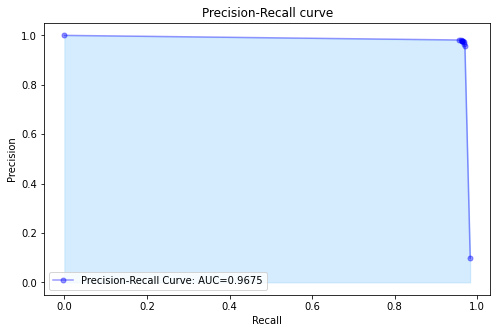

In [44]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8, 5))
# plotting points as a scatter plot
plt.fill_between(rec, Prec, color='#95d0fc', alpha=0.4)
plt.plot(rec, Prec, label= "Precision-Recall Curve: AUC=%0.4f"%auc, color= "blue",
                marker= ".",markerfacecolor='blue', markersize=10, alpha=0.4)

# x-axis label
plt.xlabel('Recall')
# frequency label
plt.ylabel('Precision')
# plot title
plt.title('Precision-Recall curve')
# showing legend
plt.legend()

# function to show the plot
plt.show()

In [145]:
# import matplotlib.pyplot as plt

# fig=plt.figure(figsize=(8, 5))
# # plotting points as a scatter plot
# plt.fill_between(Prec, rec, color='#95d0fc', alpha=0.4)
# plt.plot(Prec, rec, label= "Precision-Recall Curve: AUC=%0.4f"%auc, color= "blue",
#                 marker= ".",markerfacecolor='blue', markersize=10, alpha=0.4)

# # x-axis label
# plt.xlabel('Precision')
# # frequency label
# plt.ylabel('Recall')
# # plot title
# plt.title('Precision-Recall curve')
# # showing legend
# plt.legend()

# # function to show the plot
# plt.show()

# Selection Best Threshold  == 0.90

In [16]:
threshold_iou = 0.50
DataFrame0  = pd.read_csv(f'/media/tohn/SSD_ex/YOLOv5/result_5m/prosmise12/scorethr_e400_prosmise12testset/PCI09/labels/prosmise12-PCI09.csv')
table = rebox(DataFrame0)
result_rebox = Get_1boxPre(table)
test_ = Get_1boxAct(test)
df_merge = map_table(test_, result_rebox)
result = fill_(df_merge)
Eva_table = EvaluationTeble(result, threshold_iou)
### Calculate perfermance matrix 
sum_TP = sum(list(Eva_table.TP))
sum_FP = sum(list(Eva_table.FP))
sum_FN = sum(list(Eva_table.FN))
sum_count = sum(list(Eva_table['count']))
sum_pred_count = sum(list(Eva_table.pred_count))
recall = sum_TP/(sum_TP+sum_FN)
precision = sum_TP/(sum_TP+sum_FP)

## Show Performance Result

In [17]:
IoU_pred = Eva_table['IoU_img'].tolist()
aa = []
for m in IoU_pred: 
    if m.shape[0] >1:
        a_ =[]
        for i in range(m.shape[1]):
            a = max(m[0][i],m[1][i])
            a_.append(float(a))
        a = np.mean(a_)
        aa.append(a)
    else:
        a = m.mean()
        aa.append(float(a))

#print('\n', 'IoU :', aa)
print('\n', 'IoU Avg :', np.mean(aa))


 IoU Avg : 0.8320423304188163


In [18]:
print(f'True Positive ** SUM = {sum_TP}')
#print(f'{list(Eva_table.TP)}')
print('-' * 50)
print(f'False  Positive ** SUM = {sum_FP}')
#print(f'{list(Eva_table.FP)}')
print('-' * 50)
print(f'False Negative  ** SUM = {sum_FN}')
#print(f'{list(Eva_table.FN)}\n')
print('-' * 50)
print(f'Precision ** : {precision}\n')
print(f'Recall ** : {recall}\n')
print('-' * 50)

print(f' Result Dataframe {Eva_table.shape}')
Eva_table

True Positive ** SUM = 892
--------------------------------------------------
False  Positive ** SUM = 17
--------------------------------------------------
False Negative  ** SUM = 41
--------------------------------------------------
Precision ** : 0.9812981298129813

Recall ** : 0.9560557341907824

--------------------------------------------------
 Result Dataframe (933, 17)


,fileName,Path,gt_xmin,gt_ymin,gt_xmax,gt_ymax,count,pred_xmin,pred_ymin,pred_xmax,pred_ymax,pred_score,pred_count,IoU_img,TP,FP,FN
0,15ISBI10Case00.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[152.0],[128.0],[232.0],[256.0],1,[156.0192],[132.0192],[236.0064],[259.008],[0.974619],1.0,[[tensor(0.8586)]],1,0,0
1,15ISBI10Case02.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[144.0],[128.0],[224.0],[256.0],1,[147.9936],[125.9904],[220.992],[252.0192],[0.977351],1.0,[[tensor(0.8655)]],1,0,0
2,15ISBI10Case03.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[152.0],[136.0],[224.0],[248.0],1,[152.9856],[133.0176],[222.9888],[245.9904],[0.981624],1.0,[[tensor(0.9222)]],1,0,0
3,15ISBI10Case04.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[128.0],[150.0],[200.0],[256.0],1,[122.9952],[145.9968],[200.9856],[253.0176],[0.972774],1.0,[[tensor(0.8583)]],1,0,0
4,15ISBI10Case05.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[208.0],[160.0],[248.0],[232.0],1,[197.9904],[146.9952],[258.0096],[244.992],[0.975071],1.0,[[tensor(0.4818)]],0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,UCL9Case28.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[168.0],[152.0],[248.0],[240.0],1,[168.9984],[148.992],[244.992],[240.0],[0.980774],1.0,[[tensor(0.9107)]],1,0,0
929,UCL9Case30.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[144.0],[152.0],[216.0],[240.0],1,[139.008],[152.9856],[216.0],[240.0],[0.981305],1.0,[[tensor(0.9351)]],1,0,0
930,UCL9Case33.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[160.0],[144.0],[240.0],[248.0],1,[159.0144],[145.9968],[235.008],[241.9968],[0.981879],1.0,[[tensor(0.8555)]],1,0,0
931,UCL9Case35.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[160.0],[144.0],[232.0],[240.0],1,[166.0032],[143.0016],[231.0144],[240.9984],[0.981441],1.0,[[tensor(0.8944)]],1,0,0


In [19]:
Eva_table.to_csv('/home/kannika/file/Evaluation_Prosmise12YOLOv5m_prosmise12testset_scorethr_DetectPy.csv')

In [48]:
print(f'Number** Bbox Prediction TP : {int(sum(Eva_table.TP))}\n')
sum_count0 = sum(list(Eva_table['count']))
print(f'Number** Bbox ground Truth : {int(sum_count0)}')

Number** Bbox Prediction TP : 892

Number** Bbox ground Truth : 933


In [49]:
neg = np.array([[0, sum_FP]]) ## TN, FP 
pos = np.array([[sum_FN, sum_TP]]) ## FN, TP
cf_matrix = np.concatenate((neg, pos), axis=0)
cf_matrix
print(cf_matrix)
#labels = [‘True Neg’,’False Pos’,’False Neg’,’True Pos’]

[[  0  17]
 [ 41 892]]


Text(0.5, 21.5, 'Predicted label')

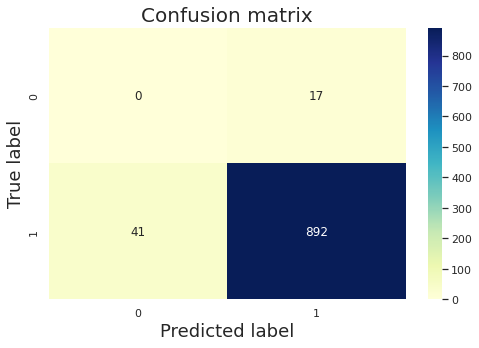

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

Text(0.5, 1.0, 'Confusion Matrix')

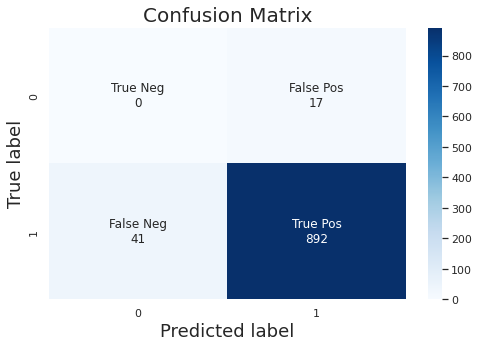

In [51]:
group_names = ['True Neg','False Pos','False Neg','True Pos' ]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
#xyplotlabels = ['True Label' ,'Predicted Label']
# group_percentages = ['{0:.2%}'.format(value) for value in
#                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(8,5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.ylabel('True label',fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=20)

# Plot img Prediction

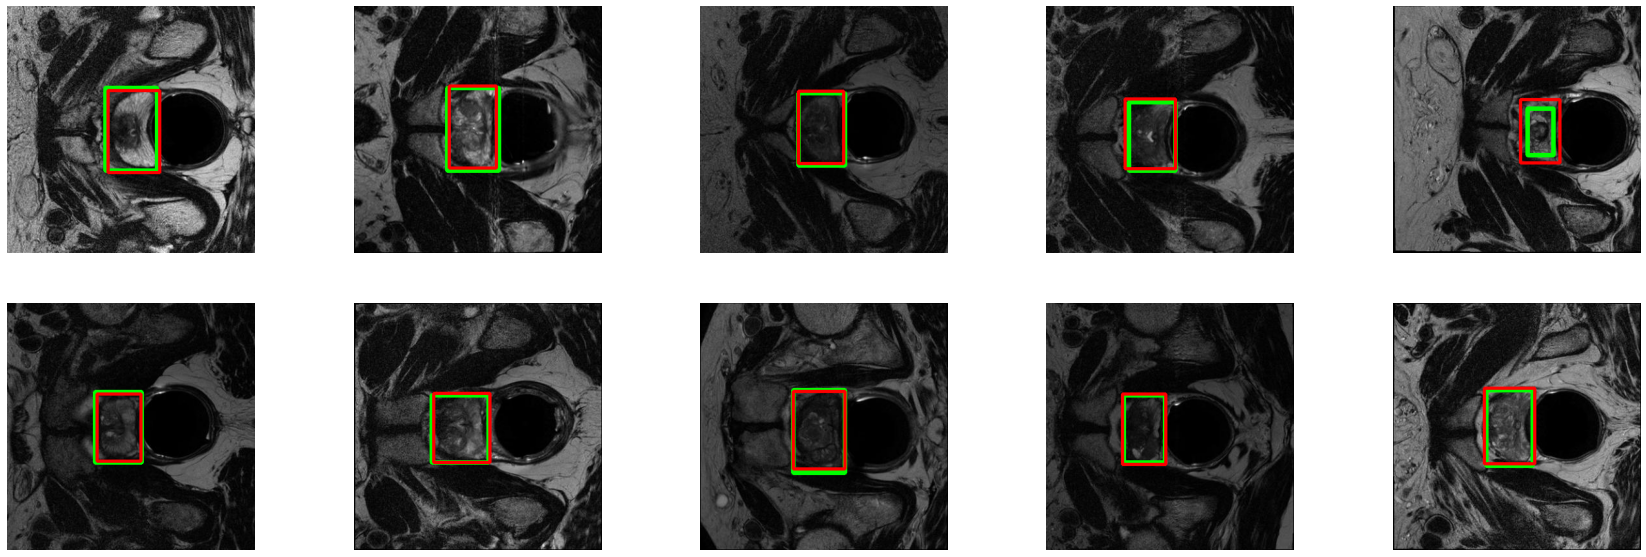

In [52]:
# Plot img Prediction
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False

res = Eva_table
w = 20
h = 20
fig = plt.figure(figsize=(30, 10))
columns = 5
rows = 2

fileName = Eva_table['fileName'].tolist()
for m in range(1, columns*rows +1):
    res = Eva_table[Eva_table['fileName'] ==fileName[m-1]]

    i = 0
    #load image origin save to test.jpg
    import cv2
    from IPython.display import Image
    img_path = res['Path'].tolist()[0]
    img_c = cv2.imread(img_path)

    for j in range(len(res['gt_xmin'].tolist()[i])):
        xmin_pre = int(res['gt_xmin'].tolist()[i][j])
        ymin_pre = int(res['gt_ymin'].tolist()[i][j])
        xmax_pre = int(res['gt_xmax'].tolist()[i][j])
        ymax_pre = int(res['gt_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 6)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 6)

    for j in range(len(res['pred_xmin'].tolist()[i])):
        xmin_pre = int(res['pred_xmin'].tolist()[i][j])
        ymin_pre = int(res['pred_ymin'].tolist()[i][j])
        xmax_pre = int(res['pred_xmax'].tolist()[i][j])
        ymax_pre = int(res['pred_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 4)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 4)

    fig.add_subplot(rows, columns, m)
    plt.imshow(image_pre)
    plt.axis('off')
        
plt.show()

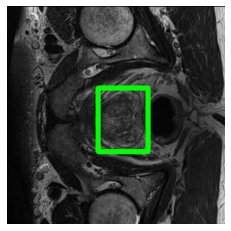

In [20]:
# Plot img gt
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False


res = Eva_table[Eva_table['fileName'] == 'ISBI9Case05.jpg']

i = 0
#load image origin save to test.jpg
import cv2
from IPython.display import Image
img_path = res['Path'].tolist()[0]
img_c = cv2.imread(img_path)

for j in range(len(res['gt_xmin'].tolist()[i])):
    xmin_pre = int(res['gt_xmin'].tolist()[i][j])
    ymin_pre = int(res['gt_ymin'].tolist()[i][j])
    xmax_pre = int(res['gt_xmax'].tolist()[i][j])
    ymax_pre = int(res['gt_ymax'].tolist()[i][j])
    if j == 0:
        image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 7)
    else:
        image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (0,255,0), 7)

plt.imshow(image_pre)
plt.axis('off')
        
plt.show()

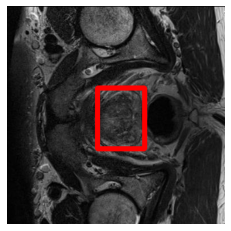

In [21]:
# Plot img prediction
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False


res = Eva_table[Eva_table['fileName'] == 'ISBI9Case05.jpg']

i = 0
#load image origin save to test.jpg
import cv2
from IPython.display import Image
img_path = res['Path'].tolist()[0]
img_c = cv2.imread(img_path)

for j in range(len(res['pred_xmin'].tolist()[i])):
    xmin_pre = int(res['pred_xmin'].tolist()[i][j])
    ymin_pre = int(res['pred_ymin'].tolist()[i][j])
    xmax_pre = int(res['pred_xmax'].tolist()[i][j])
    ymax_pre = int(res['pred_ymax'].tolist()[i][j])
    if j == 0:
        image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255,0,0), 7)
    else:
        image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255,0,0), 7)

plt.imshow(image_pre)
plt.axis('off')
        
plt.show()

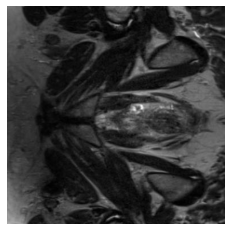

In [23]:
# Plot img gt
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False


res = Eva_table[Eva_table['fileName'] == 'I2CVB20Case02.jpg'].reset_index(drop=True)

i = 0
#load image origin save to test.jpg
import cv2
from IPython.display import Image
img_path = res['Path'].tolist()[0]
img_c = cv2.imread(img_path)
if len(res['pred_xmin'][0]) == 0:
    image_pre = img_c
else:
    for j in range(len(res['pred_xmin'].tolist()[i])):
        xmin_pre = int(res['pred_xmin'].tolist()[i][j])
        ymin_pre = int(res['pred_ymin'].tolist()[i][j])
        xmax_pre = int(res['pred_xmax'].tolist()[i][j])
        ymax_pre = int(res['pred_ymax'].tolist()[i][j])
        if j == 0:
            image_pre = cv2.rectangle(img_c, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 7)
        else:
            image_pre = cv2.rectangle(image_pre, (xmin_pre ,ymin_pre), (xmax_pre, ymax_pre), (255, 0, 0), 7)

plt.imshow(image_pre)
plt.axis('off')
        
plt.show()

In [24]:
Eva_table[Eva_table['fileName'] == 'I2CVB20Case02.jpg'].reset_index(drop=True)

,fileName,Path,gt_xmin,gt_ymin,gt_xmax,gt_ymax,count,pred_xmin,pred_ymin,pred_xmax,pred_ymax,pred_score,pred_count,IoU_img,TP,FP,FN
0,I2CVB20Case02.jpg,/media/tohn/SSD_ex/ProstateCancer/PROMISE12_im...,[192.0],[168.0],[240.0],[230.0],1,[],[],[],[],[],0.0,[tensor(0.)],0,0,1
